<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson10_LogRegAndMetrics/ClassificationMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Интегральные метрики качества классификации

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим данные для задачи классификации

In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=12)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Исправим warning

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
                 ('scaler', MinMaxScaler()),
                 ('model', LogisticRegression())
                ])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [14]:
y_test_prob = pipe.predict_proba(X_test)[:,1]

## Precision-Recall curve

* Ось X - Recall
* Ось Y - Precision

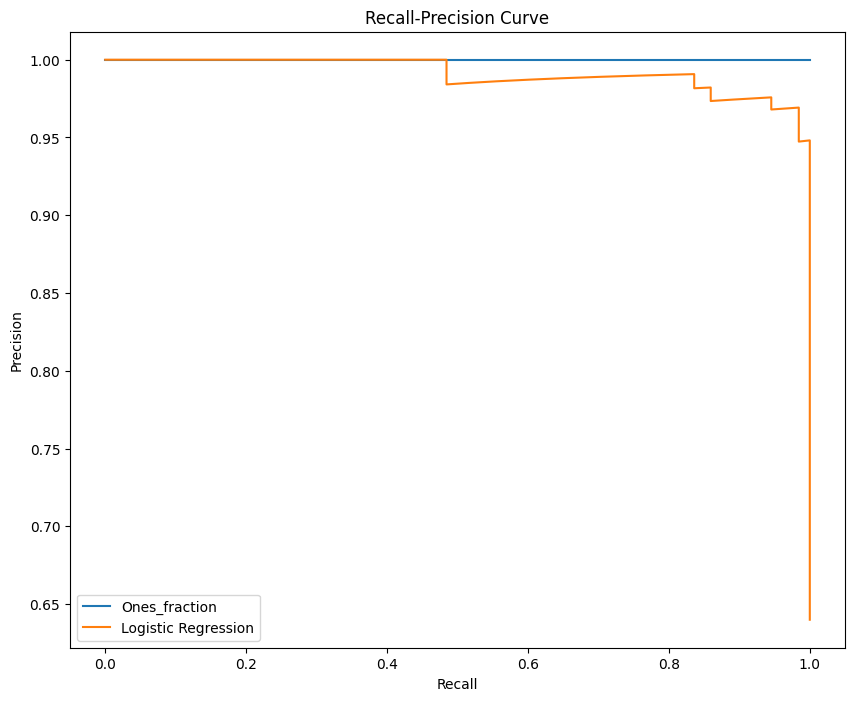

In [15]:
ones_fraction = len(y==1)/len(y)

plt.figure(figsize=(10,8))
plt.plot([0,1],[ones_fraction, ones_fraction], label="Ones_fraction")

precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='', label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

In [16]:
from sklearn import metrics

auc_score = metrics.auc(recall, precision) * 100
print('Logistic PR-AUC: %.3f' % auc_score)

Logistic PR-AUC: 99.115


## ROC-AUC

* Ось X - False Positive Rate
* Ось У - True Positive Rate

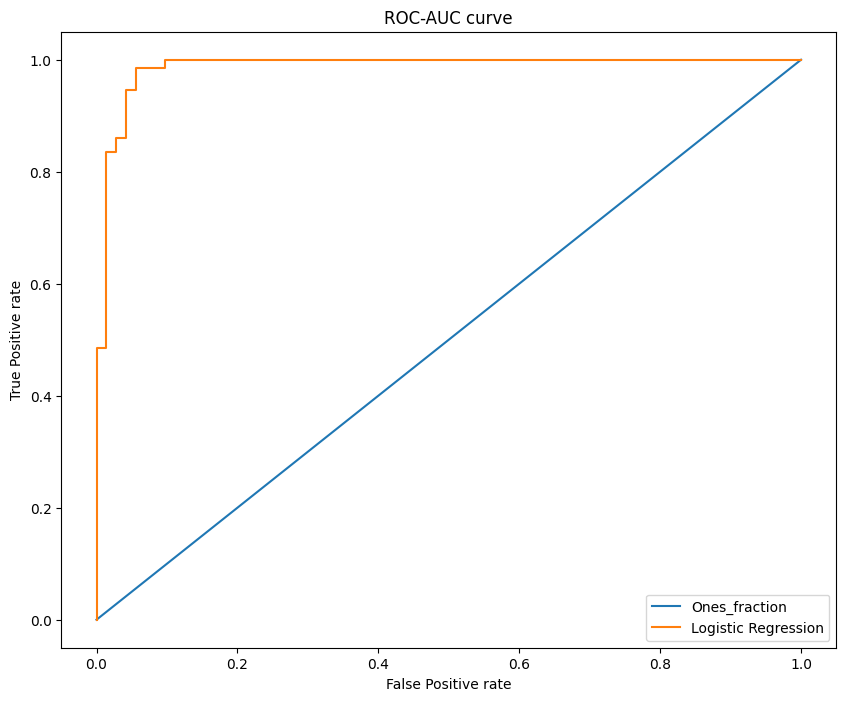

In [17]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], label="Ones_fraction")
fpr, tpr,_ = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, marker='', label="Logistic Regression")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC-AUC curve")
plt.legend()
plt.show()

In [18]:
roc_score = metrics.roc_auc_score(y_test, y_test_prob) * 100
print('Logistic PR-AUC: %.3f'% roc_score)

Logistic PR-AUC: 98.720
